# Loan-Prediction-Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv(r'https://raw.githubusercontent.com/IMNANDINI23/loan-prediction/main/loan_prediction.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
test=pd.read_csv(r'https://raw.githubusercontent.com/IMNANDINI23/loan-prediction/main/loan_prediction.csv')
Loan_ID=test.Loan_ID
data=train.append(test)
data.head()

C:\Users\coolp\AppData\Local\Temp\ipykernel_22616\1170347357.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,NaN


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,1228.000000,1228.000000,1184.000000,1200.000000,1128.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6106.551744,2925.055686,85.551144,65.093248,0.364716
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5800.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
data.isnull().sum()

Loan_ID                0
Gender                26
Married                6
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History       100
Property_Area          0
Loan_Status          614
dtype: int64

In [6]:
data.Dependents.dtypes

dtype('O')

C:\Users\coolp\AppData\Local\Temp\ipykernel_22616\2112342256.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

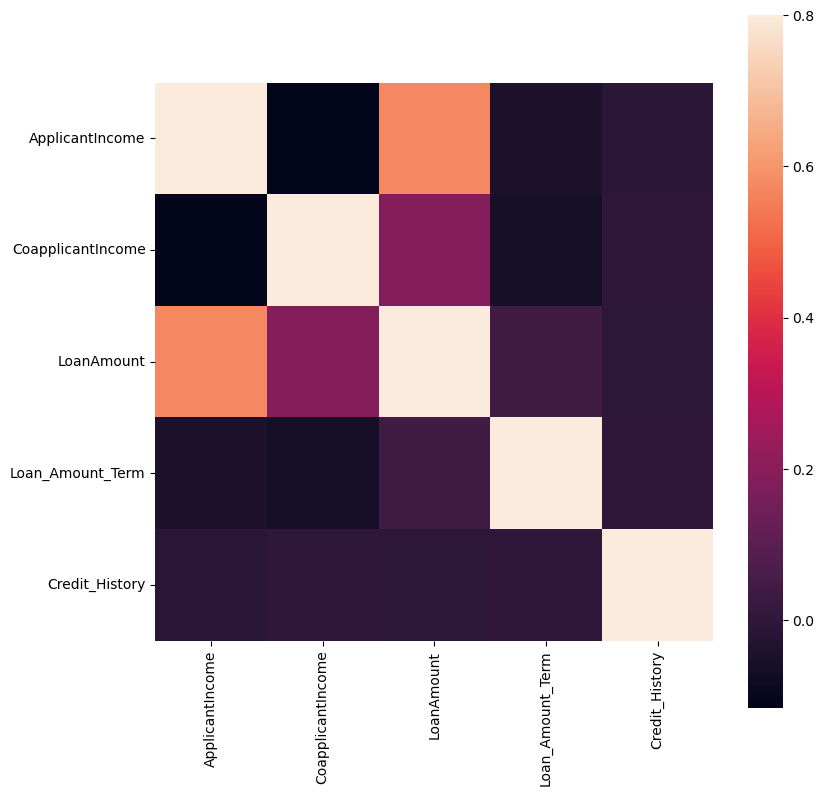

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [8]:
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    978
0.0    224
Name: Gender, dtype: int64

C:\Users\coolp\AppData\Local\Temp\ipykernel_22616\3232571843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

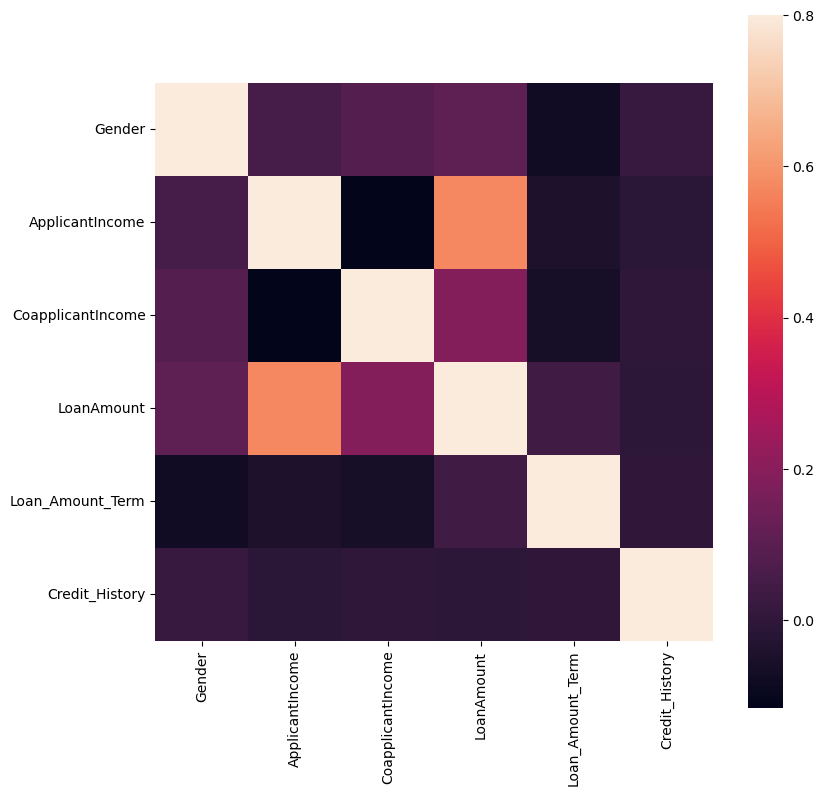

In [9]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [10]:
data.Married=data.Married.map({'Yes':1,'No':0})

In [11]:
data.Married.value_counts()

1.0    796
0.0    426
Name: Married, dtype: int64

In [12]:
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [13]:
data.Dependents.value_counts()

0.0    690
1.0    204
2.0    202
3.0    102
Name: Dependents, dtype: int64

C:\Users\coolp\AppData\Local\Temp\ipykernel_22616\3232571843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

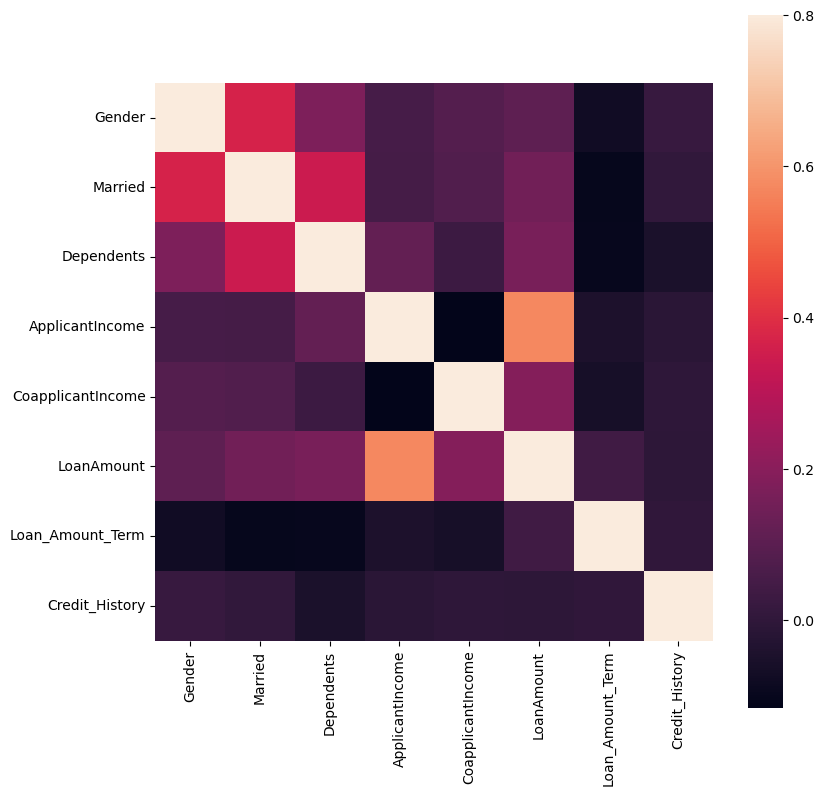

In [15]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [16]:
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [17]:
data.Education.value_counts()

1    960
0    268
Name: Education, dtype: int64

In [18]:
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [19]:
data.Self_Employed.value_counts()

0.0    1000
1.0     164
Name: Self_Employed, dtype: int64

In [20]:
data.Property_Area.value_counts()

Semiurban    466
Urban        404
Rural        358
Name: Property_Area, dtype: int64

In [21]:
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [22]:
data.Property_Area.value_counts()

1    466
2    404
0    358
Name: Property_Area, dtype: int64

C:\Users\coolp\AppData\Local\Temp\ipykernel_22616\3232571843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

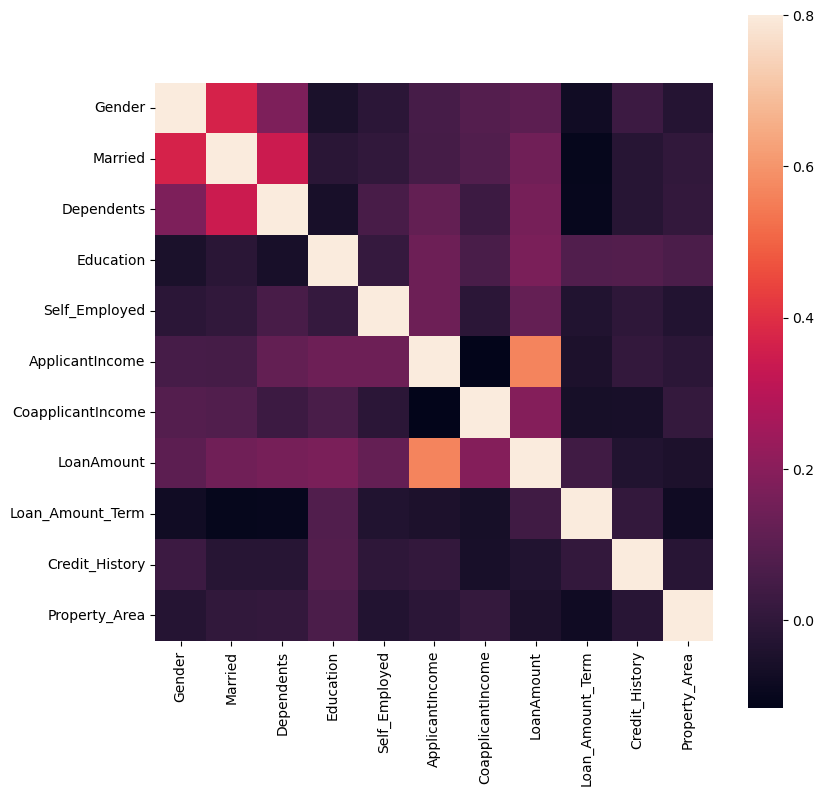

In [31]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,NaN
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,NaN
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,NaN
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,NaN
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,NaN


In [25]:
data.Credit_History.size

1228

In [26]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [27]:
data.isnull().sum()

Loan_ID                0
Gender                26
Married                6
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History         0
Property_Area          0
Loan_Status          614
dtype: int64

In [28]:
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [29]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [30]:
data.isnull().sum()

Loan_ID                0
Gender                26
Married                6
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          614
dtype: int64

In [32]:
data.Gender.value_counts()

1.0    978
0.0    224
Name: Gender, dtype: int64

In [33]:
from random import randint 
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [34]:
data.Gender.value_counts()

1.0    978
0.0    250
Name: Gender, dtype: int64

In [35]:
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [36]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                6
Dependents             0
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          614
dtype: int64

C:\Users\coolp\AppData\Local\Temp\ipykernel_22616\3232571843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

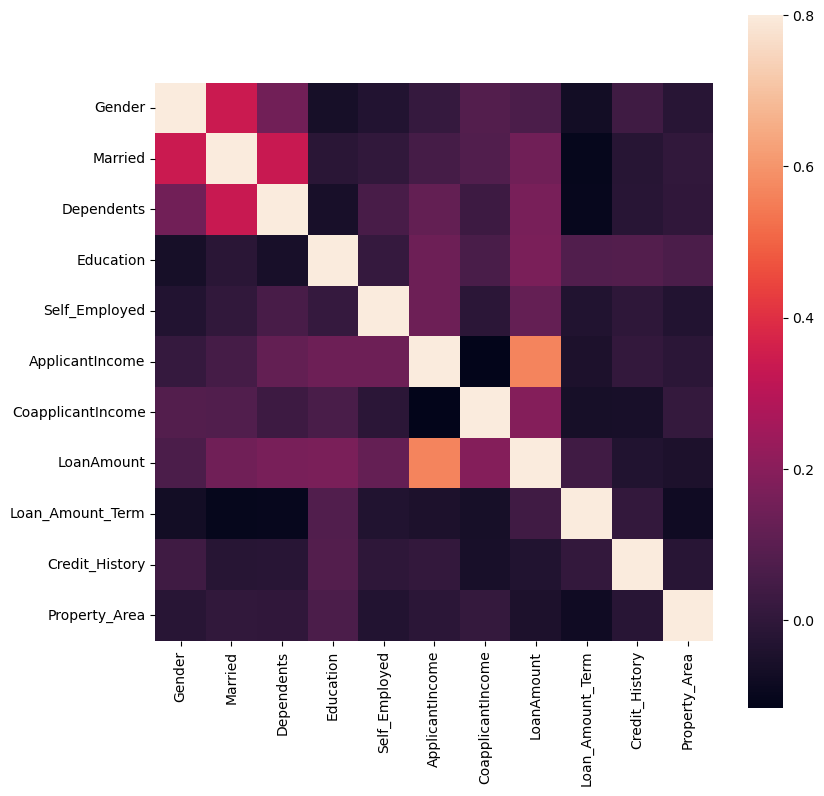

In [37]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [38]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [39]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                6
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          614
dtype: int64

In [40]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2,NaN
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,NaN
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,NaN
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,NaN
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,NaN


In [41]:
data.drop('Loan_ID',inplace=True,axis=1)

In [42]:
data.isnull().sum()

Gender                 0
Married                6
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          614
dtype: int64

In [43]:
train_X=data.iloc[:614,]
train_y=Loan_status
X_test=data.iloc[614:,]
seed=7

In [44]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=seed)

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))

In [47]:
seed=7
scoring='accuracy'

In [48]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [49]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits=10,random_state=seed)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=LogisticRegression()
svc.fit(train_X,train_y)
pred=svc.predict(test_X)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [51]:
df_output=pd.DataFrame()

In [52]:
outp=svc.predict(X_test).astype(int)
outp

ValueError: could not convert string to float: 'Y'